## **``Descriptive Statistics``**

In [ ]:
#Import the usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Numerical Summary

In [ ]:
age = [22,22,23,23,29,24,27,28]

print('mean =',np.mean(age))
print('Standard Deviation =',np.std(age))
print('Q1 =',np.quantile(age,0.25))
print('Q3 =',np.quantile(age,0.75))
print('IQR =',np.quantile(age,0.75) - np.quantile(age,0.25))

mean = 24.75
Standard Deviation = 2.6339134382131846
Q1 = 22.75
Q3 = 27.25
IQR = 4.5


In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
print('mean =',tips['total_bill'].mean())
print('median =',tips['total_bill'].median())
print('Q1 =',tips['total_bill'].quantile(0.25))

mean = 19.785942622950824
median = 17.795
Q1 = 13.3475


In [ ]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [ ]:
tips['sex'].mode()

0    Male
Name: sex, dtype: category
Categories (2, object): [Male, Female]

In [ ]:
tips['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

In [ ]:
tips.describe(include = 'category')

sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176

In [ ]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
pd.crosstab(tips['day'], columns = 'count')

col_0  count
day         
Thur      62
Fri       19
Sat       87
Sun       76

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
pd.crosstab(tips['day'],tips['sex'])

sex   Male  Female
day               
Thur    30      32
Fri     10       9
Sat     59      28
Sun     58      18

## Graphical Summary

In [ ]:
set1 = list(np.random.normal(12,2,1000))
set2 = list(np.random.normal(5,2,1000))

In [ ]:
setfull = set1 + set2
# setfull = pd.DataFrame({'var':setfull})

In [ ]:
setfull = [round(x,3) for x in setfull]

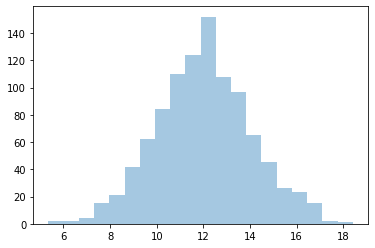

In [ ]:
sns.distplot(set1, bins = 20, kde = False)

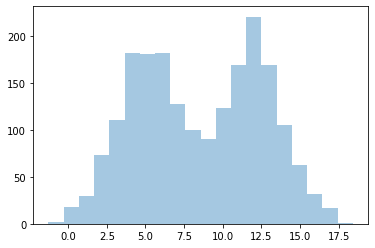

In [ ]:
sns.distplot(setfull, bins = 20, kde = False)

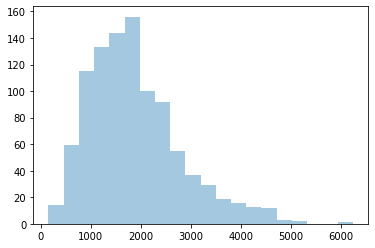

In [ ]:
sns.distplot([x**3 for x in set1], bins = 20, kde = False)

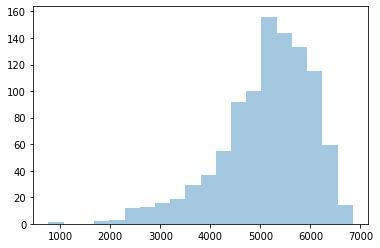

In [ ]:
sns.distplot([7000-x**3 for x in set1], bins = 20, kde = False)

In [ ]:
set3 = list(np.random.uniform(0,1,1000))

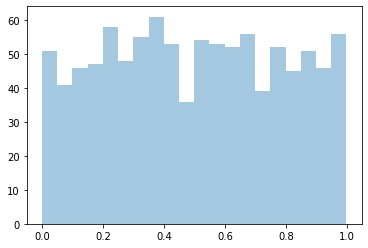

In [ ]:
sns.distplot(set3, bins = 20, kde = False)

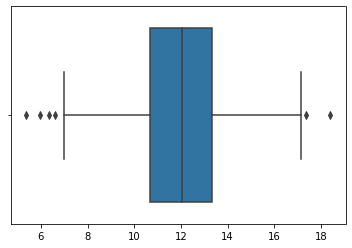

In [ ]:
sns.boxplot(set1)

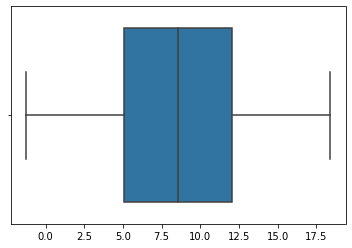

In [ ]:
sns.boxplot(setfull)

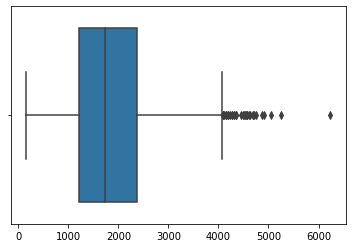

In [ ]:
sns.boxplot([x**3 for x in set1])

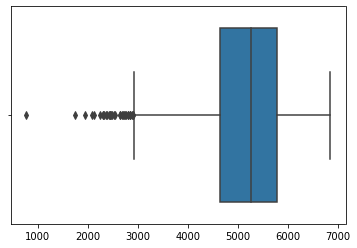

In [ ]:
sns.boxplot([7000-x**3 for x in set1])

In [ ]:
set3 = list(np.random.uniform(0,1,1000))

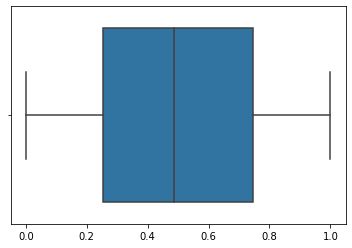

In [ ]:
sns.boxplot(set3)

detail about graphical summary already discussed in the previous study

In [ ]:
tips = sns.load_dataset('tips')

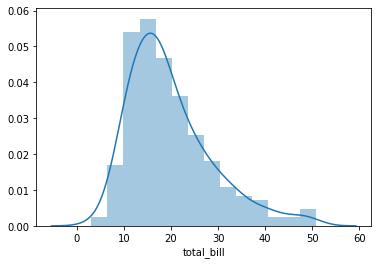

In [ ]:
sns.distplot(tips['total_bill'])

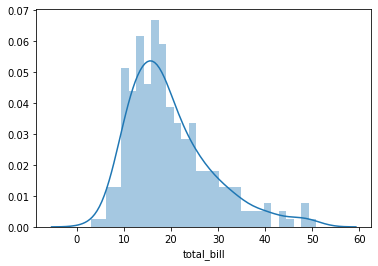

In [ ]:
sns.distplot(tips['total_bill'], bins = 30)

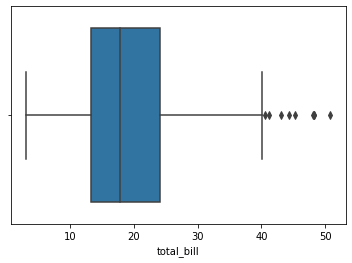

In [ ]:
sns.boxplot(tips['total_bill'])

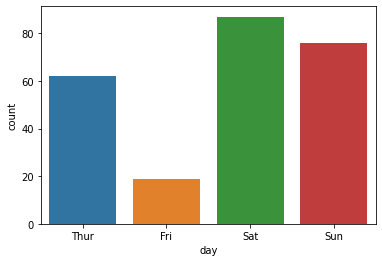

In [ ]:
sns.countplot(x = 'day', data = tips)

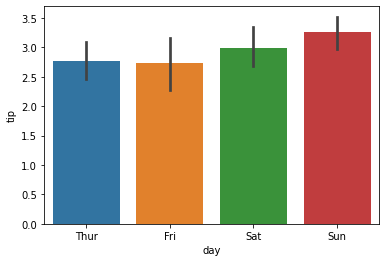

In [ ]:
sns.barplot(x = 'day', y = 'tip', data = tips)

In [ ]:
tips['tip bin'] = pd.cut(tips['tip'], bins=6)

In [ ]:
tips['tip bin'].value_counts().sort_index()

(0.991, 2.5]    108
(2.5, 4.0]       95
(4.0, 5.5]       29
(5.5, 7.0]        9
(7.0, 8.5]        1
(8.5, 10.0]       2
Name: tip bin, dtype: int64

In [ ]:
pd.crosstab(tips['tip bin'], columns = 'count')

col_0         count
tip bin            
(0.991, 2.5]    108
(2.5, 4.0]       95
(4.0, 5.5]       29
(5.5, 7.0]        9
(7.0, 8.5]        1
(8.5, 10.0]       2

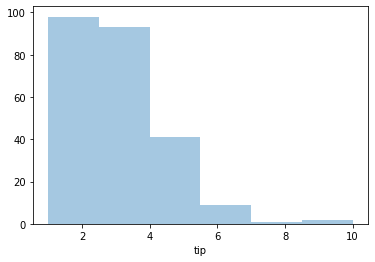

In [ ]:
sns.distplot(tips['tip'], bins = 6, kde =False)

# Inferential Statistics

1. T test single population mean
1. T test independence double population mean
    1. equal variance
    1. non equal variance
1. T test paired 
1. F test for more than two population mean
1. Proportion Test

## One Sample T-Test

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
ages = np.round(np.random.normal(30,4,40))

In [ ]:
df = pd.DataFrame({'ages':ages})

In [ ]:
df.head()

ages
0  29.0
1  28.0
2  35.0
3  29.0
4  21.0

In [ ]:
df['ages'].describe()

count    40.000000
mean     29.900000
std       3.593441
min      21.000000
25%      28.000000
50%      29.500000
75%      32.250000
max      36.000000
Name: ages, dtype: float64

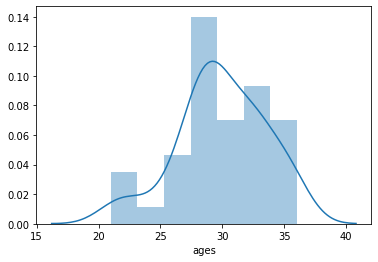

In [ ]:
sns.distplot(df['ages'])

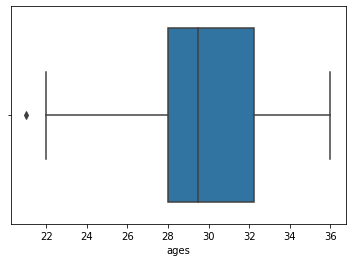

In [ ]:
sns.boxplot(df['ages'])

Ho : Age Mean Population = 27 vs Ha : Age Mean Population > 27

In [ ]:
tset, pval = ttest_1samp(df['ages'], 27)
print('p-value',pval/2)

p-value 4.506694228969573e-06


The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So, Mean population Age is higher than 27 with signicant level 5%. 

## Two Sample Independent T-Test

Let's create the dataset

In [ ]:
hat = pd.concat([pd.Series(data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],name = 'Wearing Hat'),
                pd.Series(data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')],axis = 1)

In [ ]:
hat

Wearing Hat  Score
0          Yes     70
1           No     85
2          Yes     80
3          Yes     45
4           No     80
5           No     70
6           No     90
7          Yes     70
8          Yes     55
9           No     80
10         Yes     75
11         Yes     60
12          No     70
13         Yes     85
14          No     80
15         Yes     85
16          No     55
17          No     75
18          No     65
19         Yes     70

Text(0, 0.5, 'Frequency')

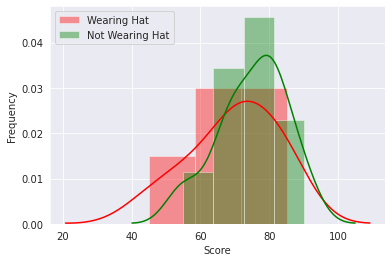

In [ ]:
sns.set_style('darkgrid')
sns.distplot(hat[hat['Wearing Hat'] == 'Yes']['Score'], color = 'red', label = 'Wearing Hat')
sns.distplot(hat[hat['Wearing Hat'] == 'No']['Score'], color = 'green', label ='Not Wearing Hat')
plt.legend()
plt.ylabel('Frequency')

The distribution is seems to follow the Normal Distribution, let's try use the Independent T-Test from the Scipy

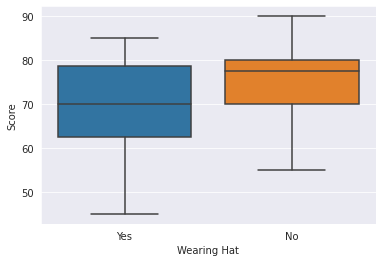

In [ ]:
sns.boxplot(x = 'Wearing Hat', y = 'Score', data = hat)

Ho : Mean Popolation of Score not wearing hat = Mean Popolation of Score wearing hat 
<br>
Ha : Mean Popolation of Score not wearing hat > Mean Popolation of Score wearing hat

non equal variance assumption

In [ ]:
from scipy.stats import ttest_ind
result = list(ttest_ind(
    hat[hat['Wearing Hat'] == 'No']['Score'], 
    hat[hat['Wearing Hat'] == 'Yes']['Score'],
    equal_var = False
))
print('T-Statistic:', result[0])
print('P-Value:', result[1]/2)

T-Statistic: 1.0493389512356741
P-Value: 0.1543203279173745


equal variance assumption

In [ ]:
from scipy.stats import ttest_ind
result = list(ttest_ind(
    hat[hat['Wearing Hat'] == 'No']['Score'], 
    hat[hat['Wearing Hat'] == 'Yes']['Score'],
    equal_var = True
))
print('T-Statistic:', result[0])
print('P-Value:', result[1]/2)

T-Statistic: 1.049338951235674
P-Value: 0.15395387283575152


The P-value is higher than our significant level 0.05, it means we don't have enough evidence to reject the Null Hypothesis. So, Mean Popolation of Score not wearing hat are still aproximately equal to Mean Popolation of Score wearing hat.

## T-Test Paired

reaction time on driving skill before and while using cell phone

In [ ]:
with_cell_phone = [604,556,540,522,469,544,513,470,556,531,599,537,619,536,554,467]
without_cell_phone = [636,623,615,672,601,600,542,554,543,520,609,559,595,565,573,554]

df_paired = pd.DataFrame({
    'no':without_cell_phone,
    'yes':with_cell_phone
})

In [ ]:
df_paired['diff'] = df_paired['yes'] - df_paired['no']

In [ ]:
df_paired.head(10)

no  yes  diff
0  636  604   -32
1  623  556   -67
2  615  540   -75
3  672  522  -150
4  601  469  -132
5  600  544   -56
6  542  513   -29
7  554  470   -84
8  543  556    13
9  520  531    11

In [ ]:
df_paired['diff'].describe()

count     16.000000
mean     -46.500000
std       50.146452
min     -150.000000
25%      -77.250000
50%      -30.500000
75%      -16.750000
max       24.000000
Name: diff, dtype: float64

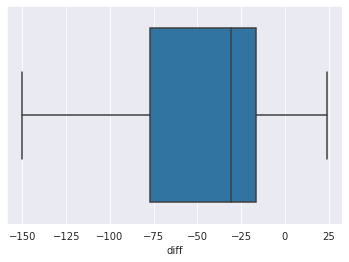

In [ ]:
sns.boxplot(df_paired['diff'])

Ho : Mean Population of difference (yes-no) = 0
<br>
Ha : Mean Population of difference (yes-no) < 0

In [ ]:
tset, pval = ttest_1samp(df_paired['diff'], 0)
print(pval/2)
print(tset)

0.0010497189034628326
-3.7091357792693707


The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So, reaction time on driving skill after using cell phone are lower than before using cell phone 

## One-Way ANOVA
Let's create the dataset

In [ ]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())

In [ ]:
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                     pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Study Hour')], axis =1)
transportdf.sample(5)

Transportation  Study Hour
2         Walking           5
1         Walking           4
9         Walking           5
24        Private           6
13         Public           6

Text(0, 0.5, 'Frequency')

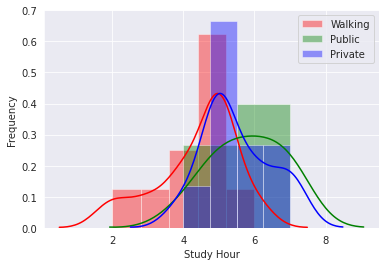

In [ ]:
sns.distplot(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], color = 'red', label = 'Walking')
sns.distplot(transportdf[transportdf['Transportation'] == 'Public']['Study Hour'], color = 'green', label = 'Public')
sns.distplot(transportdf[transportdf['Transportation'] == 'Private']['Study Hour'], color = 'blue', label = 'Private')
plt.legend()
plt.ylabel('Frequency')

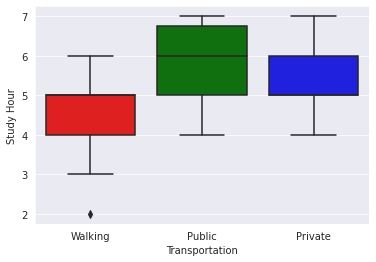

In [ ]:
sns.set_palette(['red','green','blue'])
sns.boxplot(x = 'Transportation', y = 'Study Hour', data = transportdf)

In [ ]:
for i in transportdf['Transportation'].unique():
    print('Mean of Study Hour Group {}: {}'.format(i,transportdf[transportdf['Transportation'] == i]['Study Hour'].mean()))

Mean of Study Hour Group Walking: 4.4
Mean of Study Hour Group Public: 5.8
Mean of Study Hour Group Private: 5.5


In [ ]:
print('Total Study Hour Mean: ', transportdf['Study Hour'].mean())

Total Study Hour Mean:  5.233333333333333


In [ ]:
from math import pow
total = 0
for i, j in zip(transportdf['Transportation'], transportdf['Study Hour']):
    total += (pow(((transportdf[transportdf['Transportation'] == i]['Study Hour'].mean()) - j), 2))

In [ ]:
print('MSwithin: ',total)

MSwithin:  30.500000000000004


In [ ]:
#Importing One-Way ANOVA from Scipy. One-Way ANOVA is called F one-way as well because the test follow the F- Distribution
from scipy.stats import f_oneway
f_oneway(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], 
        transportdf[transportdf['Transportation'] == 'Public']['Study Hour'],
        transportdf[transportdf['Transportation'] == 'Private']['Study Hour'])

F_onewayResult(statistic=4.809836065573772, pvalue=0.0163405142361861)

The P-value is lower than our significant level 0.05, it means wehave enough evidence to reject the Null Hypothesis. So,at least one pair of the population are not equal

## Use Case : A/B Testing numerical measurements

A financial tech company 'X' want to test whether their new app design help people to increase the amount of many that they save (saving rate). Savings rate is the percentage of each user’s monthly paycheck that he or she saves
1. Six months ago, our client randomly selected 1,000 newly signed up users and assigned 500 of them to the current design and 500 to the new design.
1. The control group went on to use the current app.
1. All users started with a 0% savings rate.
The 1,000 users represent just a small portion of the app’s total users.


In [ ]:
y_A = np.random.normal(12,5,100)
y_B = np.random.normal(15,5,100)

In [ ]:
df_old = pd.DataFrame({
    'design':'old design',
    'saving rate':y_A
})

df_new = pd.DataFrame({
    'design':'new design',
    'saving rate':y_B
})

df_ab_numerical = df_old.append(df_new)

In [ ]:
df_ab_numerical

design  saving rate
0   old design    18.803190
1   old design    13.493319
2   old design     2.199624
3   old design    22.167692
4   old design     9.791322
..         ...          ...
95  new design    19.754726
96  new design     8.268810
97  new design     4.006430
98  new design    13.374338
99  new design    15.531737

[200 rows x 2 columns]

Text(0, 0.5, 'Frequency')

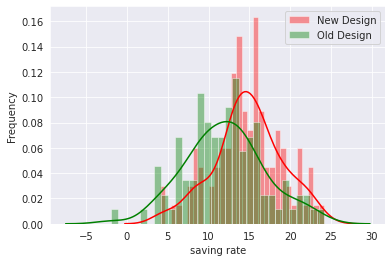

In [ ]:
sns.set_style('darkgrid')
sns.distplot(df_ab_numerical[df_ab_numerical['design'] == 'new design']['saving rate'],bins = 30, color = 'red', label = 'New Design')
sns.distplot(df_ab_numerical[df_ab_numerical['design'] == 'old design']['saving rate'],bins = 30, color = 'green', label ='Old Design')
plt.legend()
plt.ylabel('Frequency')

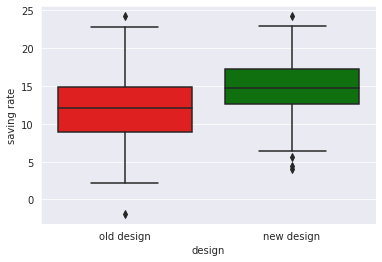

In [ ]:
sns.boxplot(x = 'design', y = 'saving rate', data = df_ab_numerical)

In [ ]:
by_design = df_ab_numerical.groupby('design')

In [ ]:
by_design.describe()

saving rate                       ...                                 
                 count       mean       std  ...        50%        75%        max
design                                       ...                                 
new design       100.0  14.788662  4.208848  ...  14.663937  17.220682  24.178263
old design       100.0  12.018717  4.889591  ...  12.080561  14.883125  24.204220

[2 rows x 8 columns]

H0 : X financial tech company's clients who recieved new layout will have the same saving rate mean than clients that recieved old layout
<br>
H1 : X financial tech company's clients who recieved new layout will have higher saving rate mean than clients that recieved old layout

In [ ]:
from scipy.stats import ttest_ind
result = list(ttest_ind(
    df_ab_numerical[df_ab_numerical['design'] == 'old design']['saving rate'], 
    df_ab_numerical[df_ab_numerical['design'] == 'new design']['saving rate'],
    equal_var = True
))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: -4.293456186459287
P-Value: 2.7527475044692865e-05


The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So, X financial tech company's clients who recieved new layout will have higher saving rate mean than clients that recieved old layout

## Use Case : A/B Testing numerical measurements more than two groups

A financial tech company want to test whether their new two app design help people to increase the amount of money that they save (saving rate). Savings rate is the percentage of each user’s monthly paycheck that he or she saves
1. Six months ago, our client randomly selected 1,500 newly signed up users and assigned 500 of them to the current design and each 500 to the new design (design 1 and design 2).
1. The control group went on to use the current app.
1. All users started with a 0% savings rate.
The 1,500 users represent just a small portion of the app’s total users.


In [ ]:
y_A = np.random.normal(12,5,100)
y_B1 = np.random.normal(15,5,100)
y_B2 = np.random.normal(16,5,100)

In [ ]:
df_old = pd.DataFrame({
    'design':'old design',
    'saving rate':y_A
})

df_new1 = pd.DataFrame({
    'design':'new design1',
    'saving rate':y_B1
})

df_new2 = pd.DataFrame({
    'design':'new design2',
    'saving rate':y_B2
})

df_ab2_numerical = df_old.append(df_new1)
df_ab2_numerical = df_ab2_numerical.append(df_new2)

In [ ]:
df_ab2_numerical

design  saving rate
0    old design     6.898530
1    old design    15.223479
2    old design     7.646823
3    old design    23.517408
4    old design    15.213357
..          ...          ...
95  new design2    14.475969
96  new design2    13.071633
97  new design2    21.914600
98  new design2    23.840111
99  new design2    23.358755

[300 rows x 2 columns]

Text(0, 0.5, 'Frequency')

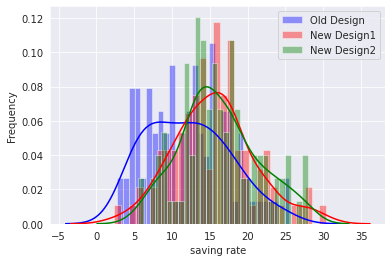

In [ ]:
sns.set_style('darkgrid')
sns.distplot(df_ab2_numerical[df_ab2_numerical['design'] == 'old design']['saving rate'],bins = 30, color = 'blue', label ='Old Design')
sns.distplot(df_ab2_numerical[df_ab2_numerical['design'] == 'new design1']['saving rate'],bins = 30, color = 'red', label = 'New Design1')
sns.distplot(df_ab2_numerical[df_ab2_numerical['design'] == 'new design2']['saving rate'],bins = 30, color = 'green', label = 'New Design2')
plt.legend()
plt.ylabel('Frequency')

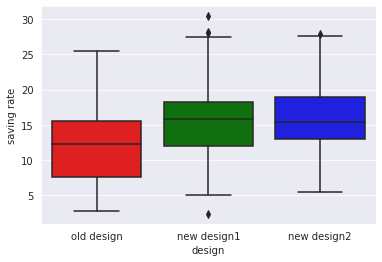

In [ ]:
sns.boxplot(x = 'design', y = 'saving rate', data = df_ab2_numerical)

In [ ]:
by_design2 = df_ab2_numerical.groupby('design')

In [ ]:
by_design2.describe()

saving rate                       ...                                 
                  count       mean       std  ...        50%        75%        max
design                                        ...                                 
new design1       100.0  15.537416  5.327458  ...  15.853471  18.198506  30.377950
new design2       100.0  16.183901  5.134709  ...  15.378509  18.908151  27.928795
old design        100.0  12.061995  5.408779  ...  12.290092  15.498927  25.498719

[3 rows x 8 columns]

H0 : There is no difference in saving rate mean of users that assign to each design
<br>
H1 : At least there is one pair of saving rate mean (of users that assign to each design) is different.

In [ ]:
f_oneway(df_ab2_numerical[df_ab2_numerical['design'] == 'old design']['saving rate'], 
        df_ab2_numerical[df_ab2_numerical['design'] == 'new design1']['saving rate'],
        df_ab2_numerical[df_ab2_numerical['design'] == 'new design2']['saving rate'])

F_onewayResult(statistic=17.551145444332896, pvalue=6.243955737011911e-08)

The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So, At least there is one pair of saving rate mean (of users that assign to each design) is different.

## Proportion one population

An newly launched online store want to test whether their conversion rate is greater than 50% or not. So they gathered 1000 visitor data randomly and observed whether they are buying or not. As a Data Scientist you are asked to perform a hypothesis testing whether their conversion rate is greater than 50%?

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import numpy as np

In [ ]:
visitor_data = np.array(['buying','buying','no buying','buying','no buying','buying','no buying','buying','buying','no buying','buying','buying','buying','no buying','no buying','no buying'])
visitor_data_encoded = np.where(visitor_data == 'buying',1,0)

In [ ]:
n_succes = np.sum(visitor_data_encoded) 
n = len(visitor_data_encoded)
success_rate = n_succes/n
print('the succes rate or conversion rate is',success_rate)

the succes rate or conversion rate is 0.5625


Ho : p = 0.5
<br>
Ha : p > 0.5 (is the conversion rate is higher than 50%)

In [ ]:
z_stat, p_value = proportions_ztest(n_succes, n, 0.5)

In [ ]:
print('p-value',p_value)

p-value 0.6142946646634824


p-value is greater than 0.05, with significant level 5% there is not enouhg evidence that the conversion rate is greater than 50%. 

## Proportion Two Population : Use Case A/B testing categorical measurement

A few months later the online store launched a new web design. They randomly assign visitor to layout A or layout B and 1000 for each design. You are asked again to perform hypothesis testing whether the conversion rate is increasing or not ?

In [ ]:
visitor_data_before = np.random.binomial(1, 0.5, 1000)
visitor_data_after = np.random.binomial(1, 0.7, 1000)
visitor_data_before = np.where(visitor_data_before == 1, 'buying','no buying')
visitor_data_after = np.where(visitor_data_after == 1,'buying','no buying')

In [ ]:
df_before = pd.DataFrame({
    'layout':'old layout',
    'conversion': visitor_data_before
})

df_after = pd.DataFrame({
    'layout':'new layout',
    'conversion': visitor_data_after    
})

In [ ]:
df_full = df_before.append(df_after)
df_full

layout conversion
0    old layout     buying
1    old layout     buying
2    old layout     buying
3    old layout     buying
4    old layout     buying
..          ...        ...
995  new layout     buying
996  new layout  no buying
997  new layout     buying
998  new layout     buying
999  new layout     buying

[2000 rows x 2 columns]

In [ ]:
pd.crosstab(df_full['layout'], df_full['conversion'])

conversion  buying  no buying
layout                       
new layout     699        301
old layout     500        500

In [ ]:
pd.crosstab(df_full['layout'], df_full['conversion'], normalize = 0)

conversion  buying  no buying
layout                       
new layout   0.699      0.301
old layout   0.500      0.500

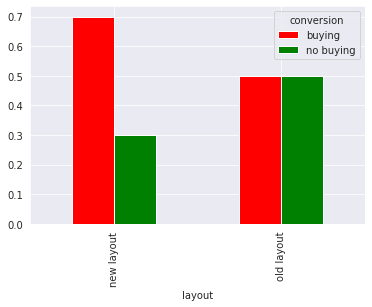

In [ ]:
pd.crosstab(df_full['layout'], df_full['conversion'], normalize = 0).plot(kind='bar')

In [ ]:
n_succes_before = len(df_full[(df_full['layout']=='old layout')&(df_full['conversion']=='buying')]) 
n_before = len(df_full[(df_full['layout']=='old layout')])
success_rate_before = n_succes_before/n_before
print('the conversion rate before change the web layout is',success_rate_before)

the conversion rate before change the web layout is 0.5


In [ ]:
n_succes_after = len(df_full[(df_full['layout']=='new layout')&(df_full['conversion']=='buying')])
n_after = len(df_full[(df_full['layout']=='new layout')])
success_rate_after = n_succes_after/n_after
print('the conversion rate after change the web layout is',success_rate_after)

the conversion rate after change the web layout is 0.699


Ho : p-after = p-before
<br>
Ha : p-after > p-before (the conversion rate after change the web layout is increasing)
<br>
or
<br>
Ho: Amazon.com visitors that receive Layout B will not have higher end-of-visit conversion rates compares to visitors that receive Layout A​
​<br>
Ha: Amazon.com visitors that receive Layout B will have higher end-of-visit conversion rates compared to visitors that receive layout A​


In [ ]:
count = np.array([n_succes_before,n_succes_after])
n_obs = np.array([n_before,n_after])

In [ ]:
z_stat, p_value = proportions_ztest(count, n_obs)

In [ ]:
print('{0:0.5f}'.format(p_value))

0.00000


p-value is lower than 0.05, with significant level 5% there is enough evidence that Amazon.com visitors that receive Layout B will have higher end-of-visit conversion rates compared to visitors that receive layout A​


## Manual Calculation one sample T-Test for mean

In [ ]:
from scipy import stats

In [ ]:
age = [27, 26, 27, 29, 23, 30, 23, 31, 29, 31, 30, 23, 34, 24, 24, 25, 30,
       26, 28, 32]

\begin{align}
H_o : \mu = 26
\end{align}
\begin{align}
H_a : \mu > 26 \textrm{  or  } H_a : \mu < 30 \textrm{  or  } H_a : \mu \neq 26 
\end{align}

In [ ]:
x_bar = np.mean(age)
s = np.std(age, ddof = 1)
n = len(age)
mu = 26

print("rata-rata contoh",x_bar)
print("standar deviasi contoh",s)
print("banyaknya contoh",n)

rata-rata contoh 27.6
standar deviasi contoh 3.299122690400554
banyaknya contoh 20


\begin{align}
T = \frac{\bar{x} - \mu}{s/\sqrt{n}}
\end{align}

In [ ]:
T = (x_bar - mu)/(s/np.sqrt(n))
print(T)

2.168884942902981


### 1. rejection region if the alternate hypothesis

\begin{align}
H_a : \mu > 26
\end{align}

the rejection region will be:

\begin{align}
T > T_\alpha,db = n-1
\end{align}

\begin{align}
T_\alpha,db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

In [ ]:
alpha = 0.05
T_alfa_db = stats.t.ppf(1-alpha,n-1)
print('critical value',T_alfa_db)

critical value 1.729132811521367


T statistics is greater than the critical value(reject Ho)
\begin{align}
T = 2.168 > T_\alpha,db = n-1 = 1.729
\end{align}

rejection region using p-value (reject Ho)

In [ ]:
x_axis = [i/10 for i in range(-35,36)]
y_axis = [stats.t.pdf(i,n-1) for i in x_axis]

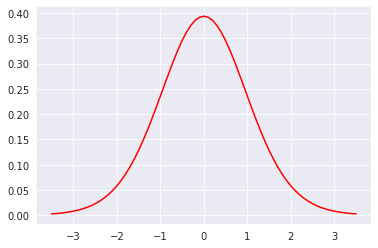

In [ ]:
plt.plot(x_axis,y_axis)

In [ ]:
print('p-value = P(T>2.168) = ',stats.t.sf(T,n-1))

p-value = P(T>2.168) =  0.021494127565753255


rejection region using p-value scipy (reject Ho)

In [ ]:
tstat, p_value = ttest_1samp(age,26) 

In [ ]:
print('t statistics',tstat)
print('t statistics',p_value/2) # divided by 2 because only one sidedd

t statistics 2.168884942902981
t statistics 0.021494127565753255


with significant level 5%, we have enough evidence that age mean of population is greater than 26

![alt text](https://lh4.googleusercontent.com/dH_I0v2ho0IGauXHkoPRDXSsvSbdOodk3y_m1Lbr_qmXyrT-FosXZUB32cr-xP7QIwO_gI8Zy-D3rznFqj9Igg2SmH9HE2JQCTdAHUEW)

### 2. rejection region if the alternate hypothesis

\begin{align}
H_a : \mu < 26
\end{align}

the rejection region will be:

\begin{align}
T < -T_\alpha,db = n-1
\end{align}

\begin{align}
T_\alpha,db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

In [ ]:
alpha = 0.05
T_alfa_db = stats.t.ppf(1-alpha,n-1)
print('critical value',-T_alfa_db)

critical value -1.729132811521367


T statistics is greater than the critical value (don't reject Ho):
\begin{align}
T = 2.168 > -T_\alpha,db = n-1 = -1.729
\end{align}

rejection region using p-value

In [ ]:
print('p-value',stats.t.sf(-T,n-1))

p-value 0.9785058724342468


hyphotesis testing using of one sample ttest for mean in scipy is not supported when: 
1. this cases : mean sample is greater (27.6) than hypotetical mean (26) and the alternate is less than ($H_a : \mu < 26$)
2. mean sample is less than hypotetical mean and the alternate is greater than

### 3. rejection region if the alternate hypothesis

\begin{align}
H_a : \mu \neq 26
\end{align}

the rejection region will be:

\begin{align}
T < -T_\alpha/2,db = n-1 \textrm{ or } T > T_\alpha/2,db = n-1
\end{align}

\begin{align}
T_\alpha,db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

In [ ]:
alpha = 0.05
T_alfa2_db = stats.t.ppf(1-alpha/2,n-1)
print('critical value left',-T_alfa2_db)
print('or')
print('critical value right',T_alfa2_db)

critical value left -2.093024054408263
or
critical value right 2.093024054408263


T statistics is greater than the critical value (reject Ho):
\begin{align}
T = 2.168 > T_\alpha/2,db = n-1 = 2.093
\end{align}

rejection region using p-value (reject Ho)

In [ ]:
print('p-value',stats.t.sf(abs(T),n-1)*2)

p-value 0.04298825513150651


rejection region using p-value scipy (reject Ho)

In [ ]:
tstat, p_value = ttest_1samp(age,26) 

In [ ]:
print('t statistics',tstat)
print('t statistics',p_value) 

t statistics 2.168884942902981
t statistics 0.04298825513150651


with significant level 5%, we have enough evidence that age mean of population is not equal to 26

## Manual Calculation one way Anova

In [ ]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())

In [ ]:
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                     pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Study Hour')], axis =1)
transportdf.sample(5)

Transportation  Study Hour
14         Public           4
17         Public           5
18         Public           6
12         Public           5
27        Private           5

In [ ]:
transportdf

Transportation  Study Hour
0         Walking           5
1         Walking           4
2         Walking           5
3         Walking           6
4         Walking           5
5         Walking           3
6         Walking           2
7         Walking           4
8         Walking           5
9         Walking           5
10         Public           7
11         Public           7
12         Public           5
13         Public           6
14         Public           4
15         Public           6
16         Public           5
17         Public           5
18         Public           6
19         Public           7
20        Private           5
21        Private           4
22        Private           5
23        Private           6
24        Private           6
25        Private           5
26        Private           5
27        Private           5
28        Private           7
29        Private           7

In [ ]:
transportdf.pivot_table(index = 'Transportation', aggfunc='mean')

Study Hour
Transportation            
Private                5.5
Public                 5.8
Walking                4.4

In [ ]:
transportdf['Study Hour'].mean()

5.233333333333333

In [ ]:
transportdf['Transportation'].value_counts()

Public     10
Private    10
Walking    10
Name: Transportation, dtype: int64

### MSBeetween

\begin{align}
SS_{between} = \sum_{j=1}^{k} n_j (\bar{x}_{.j}-\bar{x})^2 = n_1 (\bar{x}_{.1}-\bar{x})^2 + n_2 (\bar{x}_{.2}-\bar{x})^2 + n_3 (\bar{x}_{.3}-\bar{x})^2 
\end{align}

\begin{align}
MS_{between} = \frac{SS_{between}} {k-1}
\end{align}

\begin{gather*}
n_1, n_2, n_3 = 10 \\
\bar{x}_{.1}, \bar{x}_{.2}, \bar{x}_{.3} = 5.4, 5.8, 4.4 \\
\bar{x} = 5.2333333.. \\
k =3 
\end{gather*}


\begin{equation}
\begin{split}
SS_{between} & = 10 (5.4-5.23333)^2 + 10 (5.8-5.23333)^2 + 10 (4.4-5.23333)^2 \\
             & = 6.889 + 3.249 + 0.729 \\
             & = 10.876
\end{split}
\end{equation}

\begin{align}
MS_{between} = \frac{10.876} {2} = 5.4335
\end{align}

In [ ]:
x_1 = transportdf[transportdf['Transportation']=='Public']['Study Hour'].mean()
x_2 = transportdf[transportdf['Transportation']=='Private']['Study Hour'].mean()
x_3 = transportdf[transportdf['Transportation']=='Walking']['Study Hour'].mean()
n1,n2,n3 = 10,10,10
x_bar = transportdf['Study Hour'].mean()
k = 3

In [ ]:
SS_between = n1*(x_1-x_bar)**2 + n2*(x_2-x_bar)**2 + n3*(x_3-x_bar)**2

In [ ]:
MS_between = SS_between/(k-1)

In [ ]:
MS_between

5.433333333333329

### MSWithin

In [ ]:
transportdf

Transportation  Study Hour
0         Walking           5
1         Walking           4
2         Walking           5
3         Walking           6
4         Walking           5
5         Walking           3
6         Walking           2
7         Walking           4
8         Walking           5
9         Walking           5
10         Public           7
11         Public           7
12         Public           5
13         Public           6
14         Public           4
15         Public           6
16         Public           5
17         Public           5
18         Public           6
19         Public           7
20        Private           5
21        Private           4
22        Private           5
23        Private           6
24        Private           6
25        Private           5
26        Private           5
27        Private           5
28        Private           7
29        Private           7

In [ ]:
transportdf.pivot_table(index = 'Transportation', aggfunc='mean')

Study Hour
Transportation            
Private                5.5
Public                 5.8
Walking                4.4

\begin{align}
SS_{within} = \sum_{i=1}^{n_1} (x_{i1}-\bar{x}_{.1})^2 + \sum_{i=1}^{n_2} (x_{i1}-\bar{x}_{.2})^2 + \sum_{i=1}^{n_3} (x_{i1}-\bar{x}_{.3})^2
\end{align}

\begin{align}
MS_{within} = \frac{SS_{within}}{((n_1-1) + (n_2-1) + (n_3-1))}
\end{align}

\begin{equation}
\begin{split}
SS_{within} & =  (5-5.5)^2 + ... + (7-5.5)^2 + (7-5.8)^2 + ... + (7-5.8)^2 + (5-4.4)^2 + ... + (5-4.4)^2\\
             & = 9.6 + 8.5 + 12.39 \\
             & = 30.5
\end{split}
\end{equation}

\begin{align}
MS_{within} = \frac{30.5}{27} = 1.1296
\end{align}

In [ ]:
SS_within = sum([(i-transportdf[transportdf['Transportation']=='Public']['Study Hour'].mean())**2 for i in transportdf[transportdf['Transportation']=='Public']['Study Hour']]) + sum([(i-transportdf[transportdf['Transportation']=='Private']['Study Hour'].mean())**2 for i in transportdf[transportdf['Transportation']=='Private']['Study Hour']]) + sum([(i-transportdf[transportdf['Transportation']=='Walking']['Study Hour'].mean())**2 for i in transportdf[transportdf['Transportation']=='Walking']['Study Hour']])
SS_within

30.5

In [ ]:
MS_within = SS_within/27
MS_within

1.1296296296296295

### F Statistics

\begin{align}
F_{stat} = \frac {MS_{between}}{MS_{within}}
\end{align}

In [ ]:
F_stat = MS_between/MS_within
F_stat

4.8098360655737675

### Rejection Region

\begin{align}
F_{stat} > F_{\alpha,db_1,db_2}
\end{align}

Critical Value (reject Ho)

\begin{gather}
F_{\alpha,db_1,db_2} \\
alpha = 0.05 \\
db_1 = k-1 \\
db_2 = ((n_1-1) + (n_2-1) + (n_3-1))
\end{gather}

In [ ]:
print("critical value F_alpha",stats.f.ppf(0.05,2,27))

critical value F_alpha 0.05139086243879718


\begin{align}
F_{stat}  = 4.80983 > F_{\alpha,db_1,db_2} = 0.0513
\end{align}

p-value (reject Ho)

In [ ]:
print('p-value',stats.f.sf(F_stat,2,27))

p-value 0.01634051423618613


ANOVA scipy (reject Ho)

In [ ]:
#Importing One-Way ANOVA from Scipy. One-Way ANOVA is called F one-way as well because the test follow the F- Distribution
from scipy.stats import f_oneway
f_oneway(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], 
        transportdf[transportdf['Transportation'] == 'Public']['Study Hour'],
        transportdf[transportdf['Transportation'] == 'Private']['Study Hour'])

F_onewayResult(statistic=4.809836065573772, pvalue=0.0163405142361861)

# Non-Parametric Statistics

## Mann Whitney

In [ ]:
hat = pd.concat([pd.Series(data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],name = 'Wearing Hat'),
                pd.Series(data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')],axis = 1)

In [ ]:
hat

Wearing Hat  Score
0          Yes     70
1           No     85
2          Yes     80
3          Yes     45
4           No     80
5           No     70
6           No     90
7          Yes     70
8          Yes     55
9           No     80
10         Yes     75
11         Yes     60
12          No     70
13         Yes     85
14          No     80
15         Yes     85
16          No     55
17          No     75
18          No     65
19         Yes     70

Text(0, 0.5, 'Frequency')

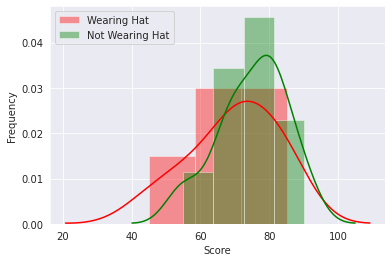

In [ ]:
sns.set_style('darkgrid')
sns.distplot(hat[hat['Wearing Hat'] == 'Yes']['Score'], color = 'red', label = 'Wearing Hat')
sns.distplot(hat[hat['Wearing Hat'] == 'No']['Score'], color = 'green', label ='Not Wearing Hat')
plt.legend()
plt.ylabel('Frequency')

The distribution is seems to follow the Normal Distribution, let's try use the Independent T-Test from the Scipy

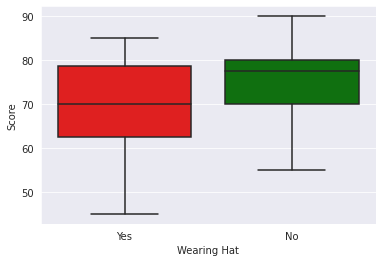

In [ ]:
sns.boxplot(x = 'Wearing Hat', y = 'Score', data = hat)

Ho : Median Popolation of Score not wearing hat = Median Popolation of Score wearing hat 
<br>
Ha : Median Popolation of Score not wearing hat > Median Popolation of Score wearing hat

In [ ]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(
    hat[hat['Wearing Hat'] == 'No']['Score'], 
    hat[hat['Wearing Hat'] == 'Yes']['Score'],
    alternative = 'greater' # M (no hat) > M (no hat)
))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 61.5
P-Value: 0.1996116335589066


The P-value is higher than our significant level 0.05, it means we don't have enough evidence to reject the Null Hypothesis. So, Mean Popolation Median of Score not wearing hat are still aproximately equal to Mean Popolation Median of Score wearing hat.

## Wilcoxon

reaction time on driving skill before and while using cell phone

In [ ]:
with_cell_phone = [604,556,540,522,469,544,513,470,556,531,599,537,619,536,554,467]
without_cell_phone = [636,623,615,672,601,600,542,554,543,520,609,559,595,565,573,554]

df_paired = pd.DataFrame({
    'no':without_cell_phone,
    'yes':with_cell_phone
})

In [ ]:
df_paired['diff'] = df_paired['yes'] - df_paired['no']

In [ ]:
df_paired.head(10)

no  yes  diff
0  636  604   -32
1  623  556   -67
2  615  540   -75
3  672  522  -150
4  601  469  -132
5  600  544   -56
6  542  513   -29
7  554  470   -84
8  543  556    13
9  520  531    11

In [ ]:
df_paired['diff'].describe()

count     16.000000
mean     -46.500000
std       50.146452
min     -150.000000
25%      -77.250000
50%      -30.500000
75%      -16.750000
max       24.000000
Name: diff, dtype: float64

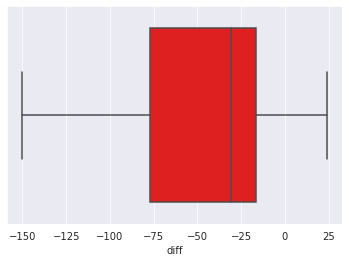

In [ ]:
sns.boxplot(df_paired['diff'])

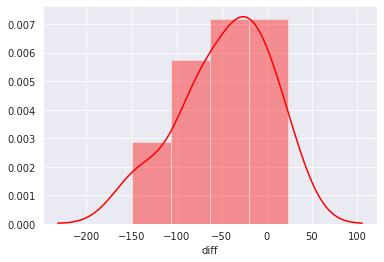

In [ ]:
sns.distplot(df_paired['diff'])

Ho : Median Population of difference (yes-no) = 0
<br>
Ha : Median Population of difference (yes-no) < 0

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
sumrank, pval = wilcoxon(df_paired['diff'], alternative = 'less')
print(pval)
print(sumrank)

0.001599741499196222
11.0


The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So, reaction time on driving skill after using cell phone are lower than before using cell phone 

## Kruskal Wallis

In [ ]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())

In [ ]:
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                     pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Study Hour')], axis =1)
transportdf.sample(5)

Transportation  Study Hour
26        Private           5
24        Private           6
27        Private           5
16         Public           5
10         Public           7

Text(0, 0.5, 'Frequency')

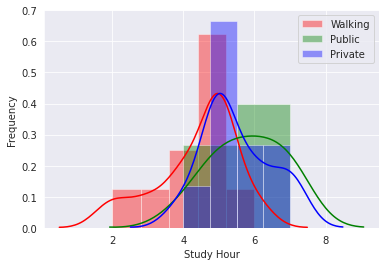

In [ ]:
sns.distplot(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], color = 'red', label = 'Walking')
sns.distplot(transportdf[transportdf['Transportation'] == 'Public']['Study Hour'], color = 'green', label = 'Public')
sns.distplot(transportdf[transportdf['Transportation'] == 'Private']['Study Hour'], color = 'blue', label = 'Private')
plt.legend()
plt.ylabel('Frequency')

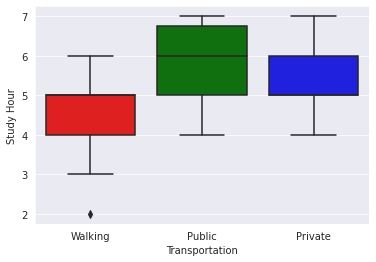

In [ ]:
sns.set_palette(['red','green','blue'])
sns.boxplot(x = 'Transportation', y = 'Study Hour', data = transportdf)

In [ ]:
for i in transportdf['Transportation'].unique():
    print('Median of Study Hour Group {}: {}'.format(i,transportdf[transportdf['Transportation'] == i]['Study Hour'].median()))

Median of Study Hour Group Walking: 5.0
Median of Study Hour Group Public: 6.0
Median of Study Hour Group Private: 5.0


In [ ]:
print('Total Study Hour Mean: ', transportdf['Study Hour'].median())

Total Study Hour Mean:  5.0


In [ ]:
#Importing One-Way ANOVA from Scipy. One-Way ANOVA is called F one-way as well because the test follow the F- Distribution
from scipy.stats import kruskal
kruskal(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], 
        transportdf[transportdf['Transportation'] == 'Public']['Study Hour'],
        transportdf[transportdf['Transportation'] == 'Private']['Study Hour'])

KruskalResult(statistic=7.01891293654697, pvalue=0.029913168775421856)

The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So,at least one pair of the population median are not equal

# Association

In [ ]:
np.random.RandomState(10)

RandomState(MT19937) at 0x7F98C9AB4468

In [ ]:
x = list(np.random.normal(5,2,100))
x = [round(i,2) for i in x]

y = [(3 + 3*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [ ]:
y2 = [i**4 for i in y]

In [ ]:
df_assotiation = pd.DataFrame({
    'x':x,
    'y':y,
    'y2':y2
})

In [ ]:
df_assotiation.head(10)

x      y             y2
0  2.92  13.37   31954.029298
1  3.49  13.78   36057.604455
2  6.14  18.07  106618.510320
3  2.45  10.15   10613.635506
4  3.81  14.06   39078.805709
5  7.65  28.81  688926.726259
6  4.92  17.09   85303.775038
7  8.25  27.95  610277.346006
8  5.84  21.08  197461.497449
9  5.27  17.81  100613.365855

## Linear

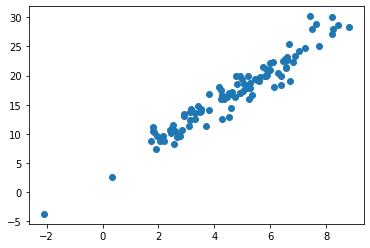

In [ ]:
plt.scatter(x,y)

In [ ]:
df_assotiation[['x','y']].corr()

x         y
x  1.000000  0.965587
y  0.965587  1.000000

## Non-Linear Monotonic

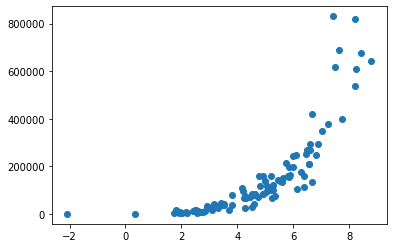

In [ ]:
plt.scatter(x,y2)

In [ ]:
df_assotiation[['x','y']].corr(method = 'spearman')

x         y
x  1.000000  0.957368
y  0.957368  1.000000

## Non-Linear Non-Monotonic

In [ ]:
np.random.RandomState(10)

RandomState(MT19937) at 0x7F98C9AB4678

In [ ]:
x = list(np.random.normal(0,10,100))
x = [round(i,2) for i in x]

y = [(4 - i**2 + np.asscalar(np.random.normal(0,10,1))) for i in x]
y = [round(i,2) for i in y]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [ ]:
df_assotiation2 = pd.DataFrame({
    'x':x,
    'y':y
})

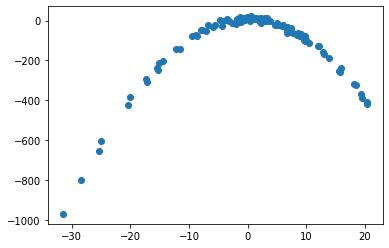

In [ ]:
plt.scatter(x,y)

In [ ]:
df_assotiation2[['x','y']].corr(method = 'spearman')

x         y
x  1.000000 -0.131858
y -0.131858  1.000000

In [ ]:
df_assotiation2[['x','y']].corr(method = 'pearson')

x         y
x  1.000000  0.341624
y  0.341624  1.000000

from this illustration :
1. when using spearman or pearson and the reult is almost zero. it doesn't mean that there is no association or weak association
1. there is till might an association but in another form of relationship (in this case is quadratics)
1. that is why graphical summary is very important

## Crime Rate vs Education

Education =  Education was measured as the percentage of residents aged at least 25 in the county who had at least a high school degree. 
<br>
Crime Rate =  Crime rate was measured as the number of crimes in that county in the past year per 1000 residents. 
<br>
County Type = Rural or Urban

In [ ]:
df_urban = pd.DataFrame({
    'Education':[70,75,80,85],
    'Crime rate':[140,120,110,105],
    'county type':'urban'
})

df_rural = pd.DataFrame({
    'Education':[55,58,60,65],
    'Crime rate':[50,40,30,25],
    'county type':'rural'    
})

In [ ]:
df_counties = df_urban.append(df_rural)

### Analyze marginaly

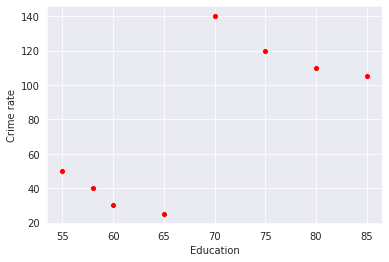

In [ ]:
sns.scatterplot(x='Education',y='Crime rate',data=df_counties)

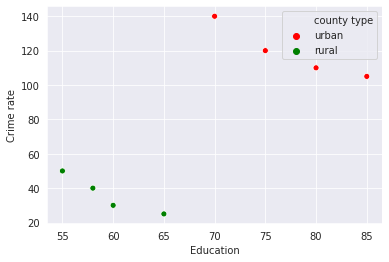

In [ ]:
sns.scatterplot(x='Education',y='Crime rate',data=df_counties,hue='county type')

In [ ]:
df_counties.corr()

Education  Crime rate
Education    1.000000    0.731798
Crime rate   0.731798    1.000000

The correlation between education and crime rate is highly positive. Is that make sense that crime rate increasing when education level increase ?

In [ ]:
df_counties

Education  Crime rate county type
0         70         140       urban
1         75         120       urban
2         80         110       urban
3         85         105       urban
0         55          50       rural
1         58          40       rural
2         60          30       rural
3         65          25       rural

In [ ]:
# transforming county type into ordinal scale
df_counties['county type encode'] = df_counties['county type'].map({'rural':0,'urban':1})

In [ ]:
df_counties

Education  Crime rate county type  county type encode
0         70         140       urban                   1
1         75         120       urban                   1
2         80         110       urban                   1
3         85         105       urban                   1
0         55          50       rural                   0
1         58          40       rural                   0
2         60          30       rural                   0
3         65          25       rural                   0

In [ ]:
df_counties.corr(method='spearman')

Education  Crime rate  county type encode
Education            1.000000    0.523810            0.872872
Crime rate           0.523810    1.000000            0.872872
county type encode   0.872872    0.872872            1.000000

it turns out that each of education and crime rate are also correlated with urbanization.
1. highly urban counties tend to have higher crime rate.
1. highly urban counties tend to have higher education.
1. perhaps, perhaps the reason for the positive correlation between education and crime rate is that education tends to be greater in more highly urbanized counties and crime rates also tend to be higher in such counties.
1. another reason may be because of another covariate/lurking variable (ex. unemployment rate in such countries) in such counties.  
1. summary,  a correlation could occur without any causal connection.

### Analyze Partially

> #### Urban

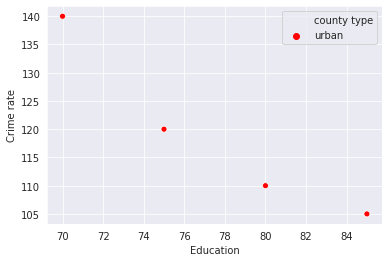

In [ ]:
sns.scatterplot(x='Education',y='Crime rate',data=df_urban,hue='county type')

In [ ]:
df_urban.corr()

Education  Crime rate
Education    1.000000   -0.959166
Crime rate  -0.959166    1.000000

> #### Rural

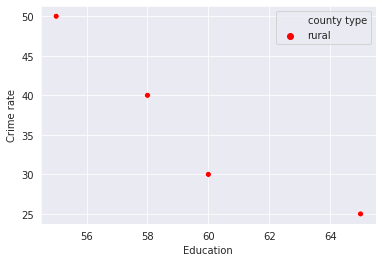

In [ ]:
sns.scatterplot(x='Education',y='Crime rate',data=df_rural,hue='county type')

In [ ]:
df_rural.corr()

Education  Crime rate
Education     1.00000    -0.94779
Crime rate   -0.94779     1.00000

when we analyzing the data partially we found that the correlation between Education and Crime Rate is highly negative. This insight is against the insight that we got when we analyzing the data marginally. We cannot ignore another information such as urbanization.

## Death Penalty and Race

In [ ]:
outside = ['White','White','Black','Black']
inside = ['White','Black','White','Black']
# hier_index = list(zip(outside,inside))
# hier_index = pd.MultiIndex.from_tuples(hier_index)

death_yes = [53,11,0,4]
death_no = [414,37,16,139]

In [ ]:
df_death_penalty = pd.DataFrame({
    "victim's race":outside,
    "Defendant's race":inside,
    'death penalty(yes)':death_yes,
    'death penalty(no)':death_no}
)

In [ ]:
df_death_penalty['Total'] = df_death_penalty['death penalty(yes)'] + df_death_penalty['death penalty(no)']
df_death_penalty['death penalty(yes) percentage'] = df_death_penalty['death penalty(yes)']/df_death_penalty['Total']
df_death_penalty['death penalty(no) percentage'] = df_death_penalty['death penalty(no)']/df_death_penalty['Total']

In [ ]:
df_death_penalty

victim's race  ... death penalty(no) percentage
0         White  ...                     0.886510
1         White  ...                     0.770833
2         Black  ...                     1.000000
3         Black  ...                     0.972028

[4 rows x 7 columns]

### White Victim

In [ ]:
df_death_penalty_copy = df_death_penalty.copy()
df_death_penalty_white = df_death_penalty_copy[df_death_penalty_copy["victim's race"]=='White']

In [ ]:
df_death_penalty_white

victim's race  ... death penalty(no) percentage
0         White  ...                     0.886510
1         White  ...                     0.770833

[2 rows x 7 columns]

### Black Victim

In [ ]:
df_death_penalty_copy = df_death_penalty.copy()
df_death_penalty_black = df_death_penalty_copy[df_death_penalty_copy["victim's race"]=='Black']

In [ ]:
df_death_penalty_black

victim's race  ... death penalty(no) percentage
2         Black  ...                     1.000000
3         Black  ...                     0.972028

[2 rows x 7 columns]

### Ignore Victim's Race

In [ ]:
df_death_penalty.drop(columns = ['death penalty(yes) percentage','death penalty(no) percentage'], inplace = True)
df_death_penalty

victim's race Defendant's race  death penalty(yes)  death penalty(no)  Total
0         White            White                  53                414    467
1         White            Black                  11                 37     48
2         Black            White                   0                 16     16
3         Black            Black                   4                139    143

In [ ]:
df_death_penalty_pivot = df_death_penalty.pivot_table(index=["Defendant's race"], aggfunc = 'sum')
df_death_penalty_pivot = df_death_penalty_pivot[['death penalty(yes)','death penalty(no)','Total']]
df_death_penalty_pivot

death penalty(yes)  death penalty(no)  Total
Defendant's race                                              
Black                             15                176    191
White                             53                430    483

In [ ]:
df_death_penalty_pivot['Total'] = df_death_penalty_pivot['death penalty(yes)'] + df_death_penalty_pivot['death penalty(no)']
df_death_penalty_pivot['death penalty(yes) percentage'] = df_death_penalty_pivot['death penalty(yes)']/df_death_penalty_pivot['Total']
df_death_penalty_pivot['death penalty(no) percentage'] = df_death_penalty_pivot['death penalty(no)']/df_death_penalty_pivot['Total']
df_death_penalty_pivot

death penalty(yes)  ...  death penalty(no) percentage
Defendant's race                      ...                              
Black                             15  ...                      0.921466
White                             53  ...                      0.890269

[2 rows x 5 columns]